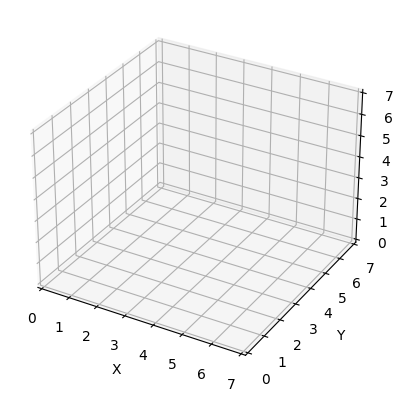

KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, IntSlider, VBox
from IPython.display import display

# 8x8x8 크기의 3차원 배열 생성
rgb_cube = np.zeros((8, 8, 8, 3), dtype=int)

# 초기 설정
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0, 7)
ax.set_ylim(0, 7)
ax.set_zlim(0, 7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 초기 슬라이더 값
r_value = 0
g_value = 0
b_value = 0
z_value = 0

# 도트 찍기 함수
def onclick(event):
    if event.inaxes == ax:
        x = int(round(event.xdata))
        y = int(round(event.ydata))
        z = z_value  # Z 좌표는 슬라이더로 조절
        if 0 <= x < 8 and 0 <= y < 8 and 0 <= z < 8:
            rgb_cube[x, y, z] = [r_value, g_value, b_value]  # 선택된 RGB 값으로 설정
            color = (r_value / 15, g_value / 15, b_value / 15)
            ax.scatter(x, y, z, c=[color], s=100)  # 색상은 정규화된 RGB 값으로 설정
            plt.draw()

# RGB 및 Z 슬라이더 업데이트 함수
def update_r(val):
    global r_value
    r_value = val

def update_g(val):
    global g_value
    g_value = val

def update_b(val):
    global b_value
    b_value = val

def update_z(val):
    global z_value
    z_value = val

# RGB 및 Z 슬라이더 설정
r_slider = IntSlider(min=0, max=15, step=1, value=0, description='Red')
g_slider = IntSlider(min=0, max=15, step=1, value=0, description='Green')
b_slider = IntSlider(min=0, max=15, step=1, value=0, description='Blue')
z_slider = IntSlider(min=0, max=7, step=1, value=0, description='Z')

# 슬라이더 변화에 따라 RGB 및 Z 값 업데이트
r_slider.observe(lambda change: update_r(change['new']), names='value')
g_slider.observe(lambda change: update_g(change['new']), names='value')
b_slider.observe(lambda change: update_b(change['new']), names='value')
z_slider.observe(lambda change: update_z(change['new']), names='value')

# 클릭 이벤트 연결
fig.canvas.mpl_connect('button_press_event', onclick)

# 슬라이더와 그림 동시에 출력
display(VBox([r_slider, g_slider, b_slider, z_slider]))
plt.show()

# 3차원 배열 출력
print(rgb_cube)
